In [1]:
import pandas as pd

# CSVファイルのパス
file_path = "csv_exports/category.csv"

# CSV読み込み
df = pd.read_csv(file_path)

# カテゴリ名一覧を表示
print("映画カテゴリ一覧:")
for category in df["name"]:
    print("-", category)


映画カテゴリ一覧:
- Action
- Animation
- Children
- Classics
- Comedy
- Documentary
- Drama
- Family
- Foreign
- Games
- Horror
- Music
- New
- Sci-Fi
- Sports
- Travel


In [2]:
import pandas as pd

# CSVファイルのパス
category_path = "csv_exports/category.csv"
film_category_path = "csv_exports/film_category.csv"

# CSV読み込み
df_category = pd.read_csv(category_path)
df_film_category = pd.read_csv(film_category_path)

# category_idごとに件数を集計
category_counts = df_film_category["category_id"].value_counts().reset_index()
category_counts.columns = ["category_id", "count"]

# category名と結合
result = category_counts.merge(df_category, on="category_id")[["name", "count"]]

# 件数順に並べ替え
result_sorted = result.sort_values(by="count", ascending=False).reset_index(drop=True)

# 出力
print("カテゴリーごとの映画件数:")
for _, row in result_sorted.iterrows():
    print(f"{row['name']}: {row['count']}")


カテゴリーごとの映画件数:
Sports: 74
Foreign: 73
Family: 69
Documentary: 68
Animation: 66
Action: 64
New: 63
Drama: 62
Sci-Fi: 61
Games: 61
Children: 60
Comedy: 58
Classics: 57
Travel: 57
Horror: 56
Music: 51


In [3]:
import pandas as pd

# CSVファイルのパス
category_path = "csv_exports/category.csv"
film_category_path = "csv_exports/film_category.csv"
film_path = "csv_exports/film.csv"

# CSV読み込み
df_category = pd.read_csv(category_path)
df_film_category = pd.read_csv(film_category_path)
df_film = pd.read_csv(film_path)

# DocumentaryカテゴリのIDを取得
doc_category_id = df_category[df_category["name"] == "Documentary"]["category_id"].values[0]

# Documentaryカテゴリに属するfilm_idを抽出
doc_film_ids = df_film_category[df_film_category["category_id"] == doc_category_id]["film_id"]

# filmテーブルからタイトルを抽出
doc_films = df_film[df_film["film_id"].isin(doc_film_ids)][["title"]]

# 出力
print("Documentaryカテゴリに含まれる映画タイトル一覧:")
for title in doc_films["title"]:
    print("-", title)


Documentaryカテゴリに含まれる映画タイトル一覧:
- ACADEMY DINOSAUR
- ADAPTATION HOLES
- ARMY FLINTSTONES
- BEACH HEARTBREAKERS
- BED HIGHBALL
- BILL OTHERS
- BONNIE HOLOCAUST
- BROTHERHOOD BLANKET
- CAUSE DATE
- CHICKEN HELLFIGHTERS
- CIDER DESIRE
- CLERKS ANGELS
- COAST RAINBOW
- CUPBOARD SINNERS
- DANCING FEVER
- DEEP CRUSADE
- DELIVERANCE MULHOLLAND
- DOZEN LION
- DUFFEL APOCALYPSE
- EGG IGBY
- EXPENDABLE STALLION
- FRENCH HOLIDAY
- HALLOWEEN NUTS
- HARDLY ROBBERS
- HAWK CHILL
- HEAVYWEIGHTS BEAST
- HOMEWARD CIDER
- HUNTER ALTER
- INDEPENDENCE HOTEL
- INTOLERABLE INTENTIONS
- KILL BROTHERHOOD
- MADISON TRAP
- MAJESTIC FLOATS
- METAL ARMAGEDDON
- MIDSUMMER GROUNDHOG
- MIGHTY LUCK
- MOD SECRETARY
- MODERN DORADO
- NATIONAL STORY
- NEWSIES STORY
- NORTH TEQUILA
- NOTORIOUS REUNION
- PACIFIC AMISTAD
- PELICAN COMFORTS
- POCUS PULP
- PRINCESS GIANT
- QUILLS BULL
- RAIDERS ANTITRUST
- RAINBOW SHOCK
- ROAD ROXANNE
- SAGEBRUSH CLUELESS
- SECRET GROUNDHOG
- SHIP WONDERLAND
- SHOW LORD
- SMOKING BARBARELLA
- S

C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12459 (\N{KATAKANA LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12468 (\N{KATAKANA LETTER GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-

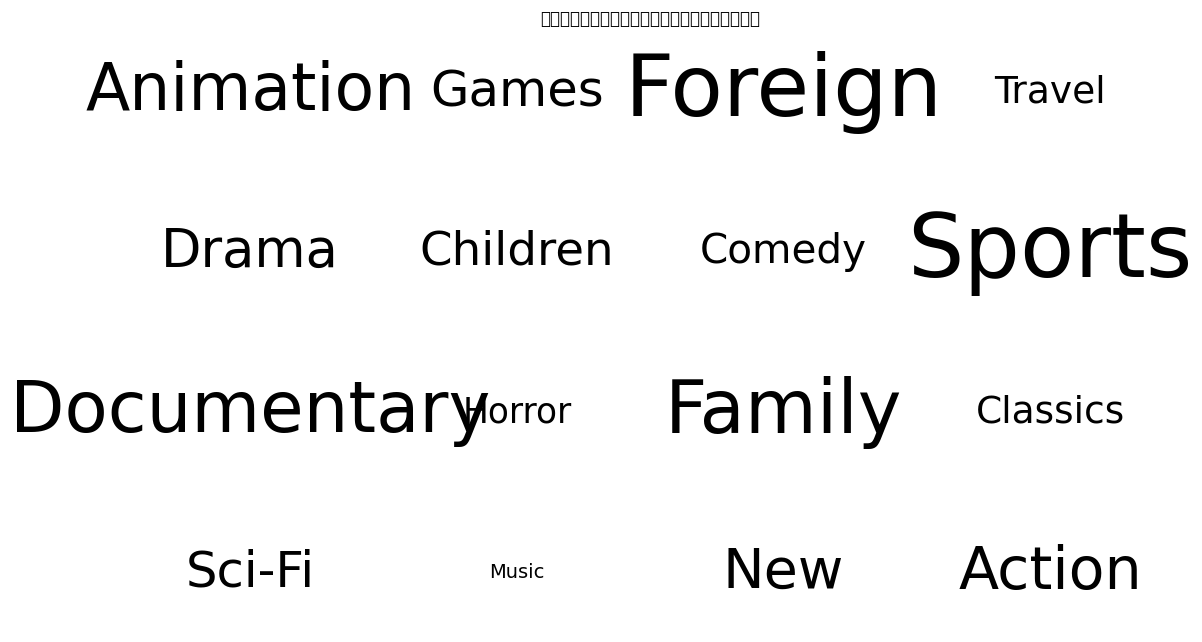

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

def load_counts(category_csv="csv_exports/category.csv",
                film_category_csv="csv_exports/film_category.csv"):
    df_cat = pd.read_csv(category_csv)
    df_fc  = pd.read_csv(film_category_csv)
    counts = (
        df_fc["category_id"]
        .value_counts()
        .rename_axis("category_id")
        .reset_index(name="count")
        .merge(df_cat, on="category_id")[["name", "count"]]
    )
    return counts

def scale_font_sizes(counts, min_font=14, max_font=64):
    cmin, cmax = counts["count"].min(), counts["count"].max()
    if cmax == cmin:
        counts["font"] = (min_font + max_font) // 2
    else:
        counts["font"] = counts["count"].apply(
            lambda x: min_font + (max_font - min_font) * (x - cmin) / (cmax - cmin)
        )
    return counts

def plot_wordcloud_like(counts, title="カテゴリーごとの映画件数（ワードクラウド風）",
                        cols=4, seed=123, save_path=None):
    # 大きい順に置くと見栄えが良い
    counts = counts.sort_values("font", ascending=False).reset_index(drop=True)

    n = len(counts)
    rows = int(np.ceil(n / cols))

    # 0〜1の正規化座標でグリッド配置
    xs = np.linspace(0.1, 0.9, cols)
    ys = np.linspace(0.9, 0.1, rows)  # 上から下へ
    grid_points = [(x, y) for y in ys for x in xs]

    # 単調さ軽減のため、配置順を少しランダム化
    rng = np.random.default_rng(seed)
    perm = rng.permutation(len(grid_points))
    grid_points = [grid_points[i] for i in perm]

    # 描画
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis("off")

    for (idx, row), (x, y) in zip(counts.iterrows(), grid_points):
        ax.text(x, y, str(row["name"]),
                fontsize=float(row["font"]),
                ha="center", va="center")

    plt.title(title)

    if save_path:
        Path(save_path).parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(save_path, bbox_inches="tight", dpi=200)
    plt.show()

if __name__ == "__main__":
    counts = load_counts(
        category_csv="csv_exports/category.csv",
        film_category_csv="csv_exports/film_category.csv"
    )
    counts = scale_font_sizes(counts, min_font=14, max_font=64)
    plot_wordcloud_like(counts, save_path=None)  # 例: "out/wordcloud_like.png"
